In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as plt2
import seaborn as sns 
import math
import sklearn as metrics

train = pd.read_csv('train.csv')
train_copy = train
identify = train.Id
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [113]:
train = train.drop(['Id'], axis=1) if 'Id' in train.columns else train_df
len(train)

1460

In [114]:
train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [98]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train.Neighborhood= le.fit_transform(train.Neighborhood)
train.ExterCond= le.fit_transform(train.ExterCond)
train.Functional= le.fit_transform(train.Functional)

train.dropna(axis=1,inplace = True)

train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,5,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,24,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,5,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,6,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,15,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,8,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,14,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,6,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,12,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [99]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice',axis = 1)
y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [100]:
X_train1 = X_train[['Neighborhood', 'GrLivArea', 'OverallCond', 'YearBuilt',
                  'Functional','LotArea','ExterCond']]

X_test1 = X_test[['Neighborhood', 'GrLivArea', 'OverallCond', 'YearBuilt',
                  'Functional','LotArea','ExterCond']]

y_train1 = y_train

y_test1 = y_test

In [101]:
X_train1

,Neighborhood,GrLivArea,OverallCond,YearBuilt,Functional,LotArea,ExterCond
135,14,1682,6,1970,6,10400,4
1452,7,1072,5,2005,6,3675,4
762,21,1547,5,2009,6,8640,4
932,21,1905,5,2006,6,11670,4
435,5,1661,6,1996,6,10667,4
...,...,...,...,...,...,...,...
1095,5,1314,5,2006,6,9317,4
1130,18,1981,3,1928,3,7804,4
1294,7,864,7,1955,6,8172,4
860,6,1426,8,1918,6,7642,4


In [102]:
from sklearn.linear_model import LinearRegression

linearmodel1 = LinearRegression().fit(X_train1,y_train1)

In [103]:
coeff = linearmodel1.score(X_train1, y_train1)
print('Coefficient of Determination for Experiment 1:', coeff)

Coefficient of Determination for Experiment 1: 0.6760401951362368


Experiment 2

<AxesSubplot:>

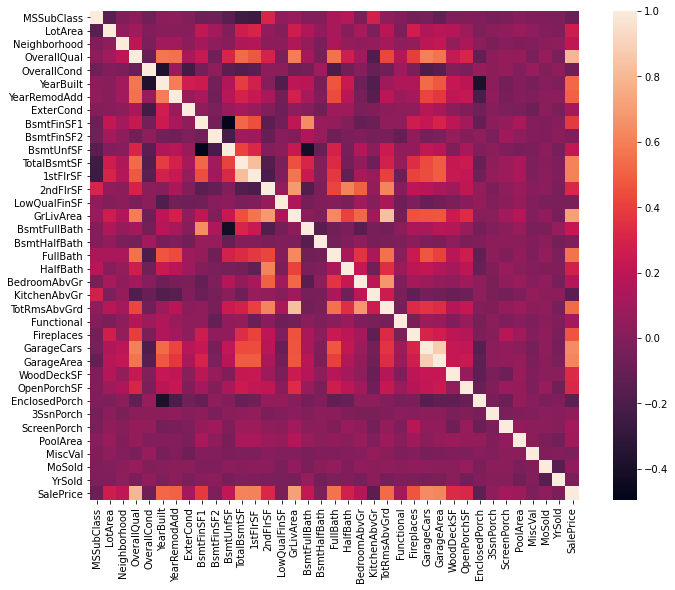

In [104]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(), vmax=1, square=True)

<AxesSubplot:>

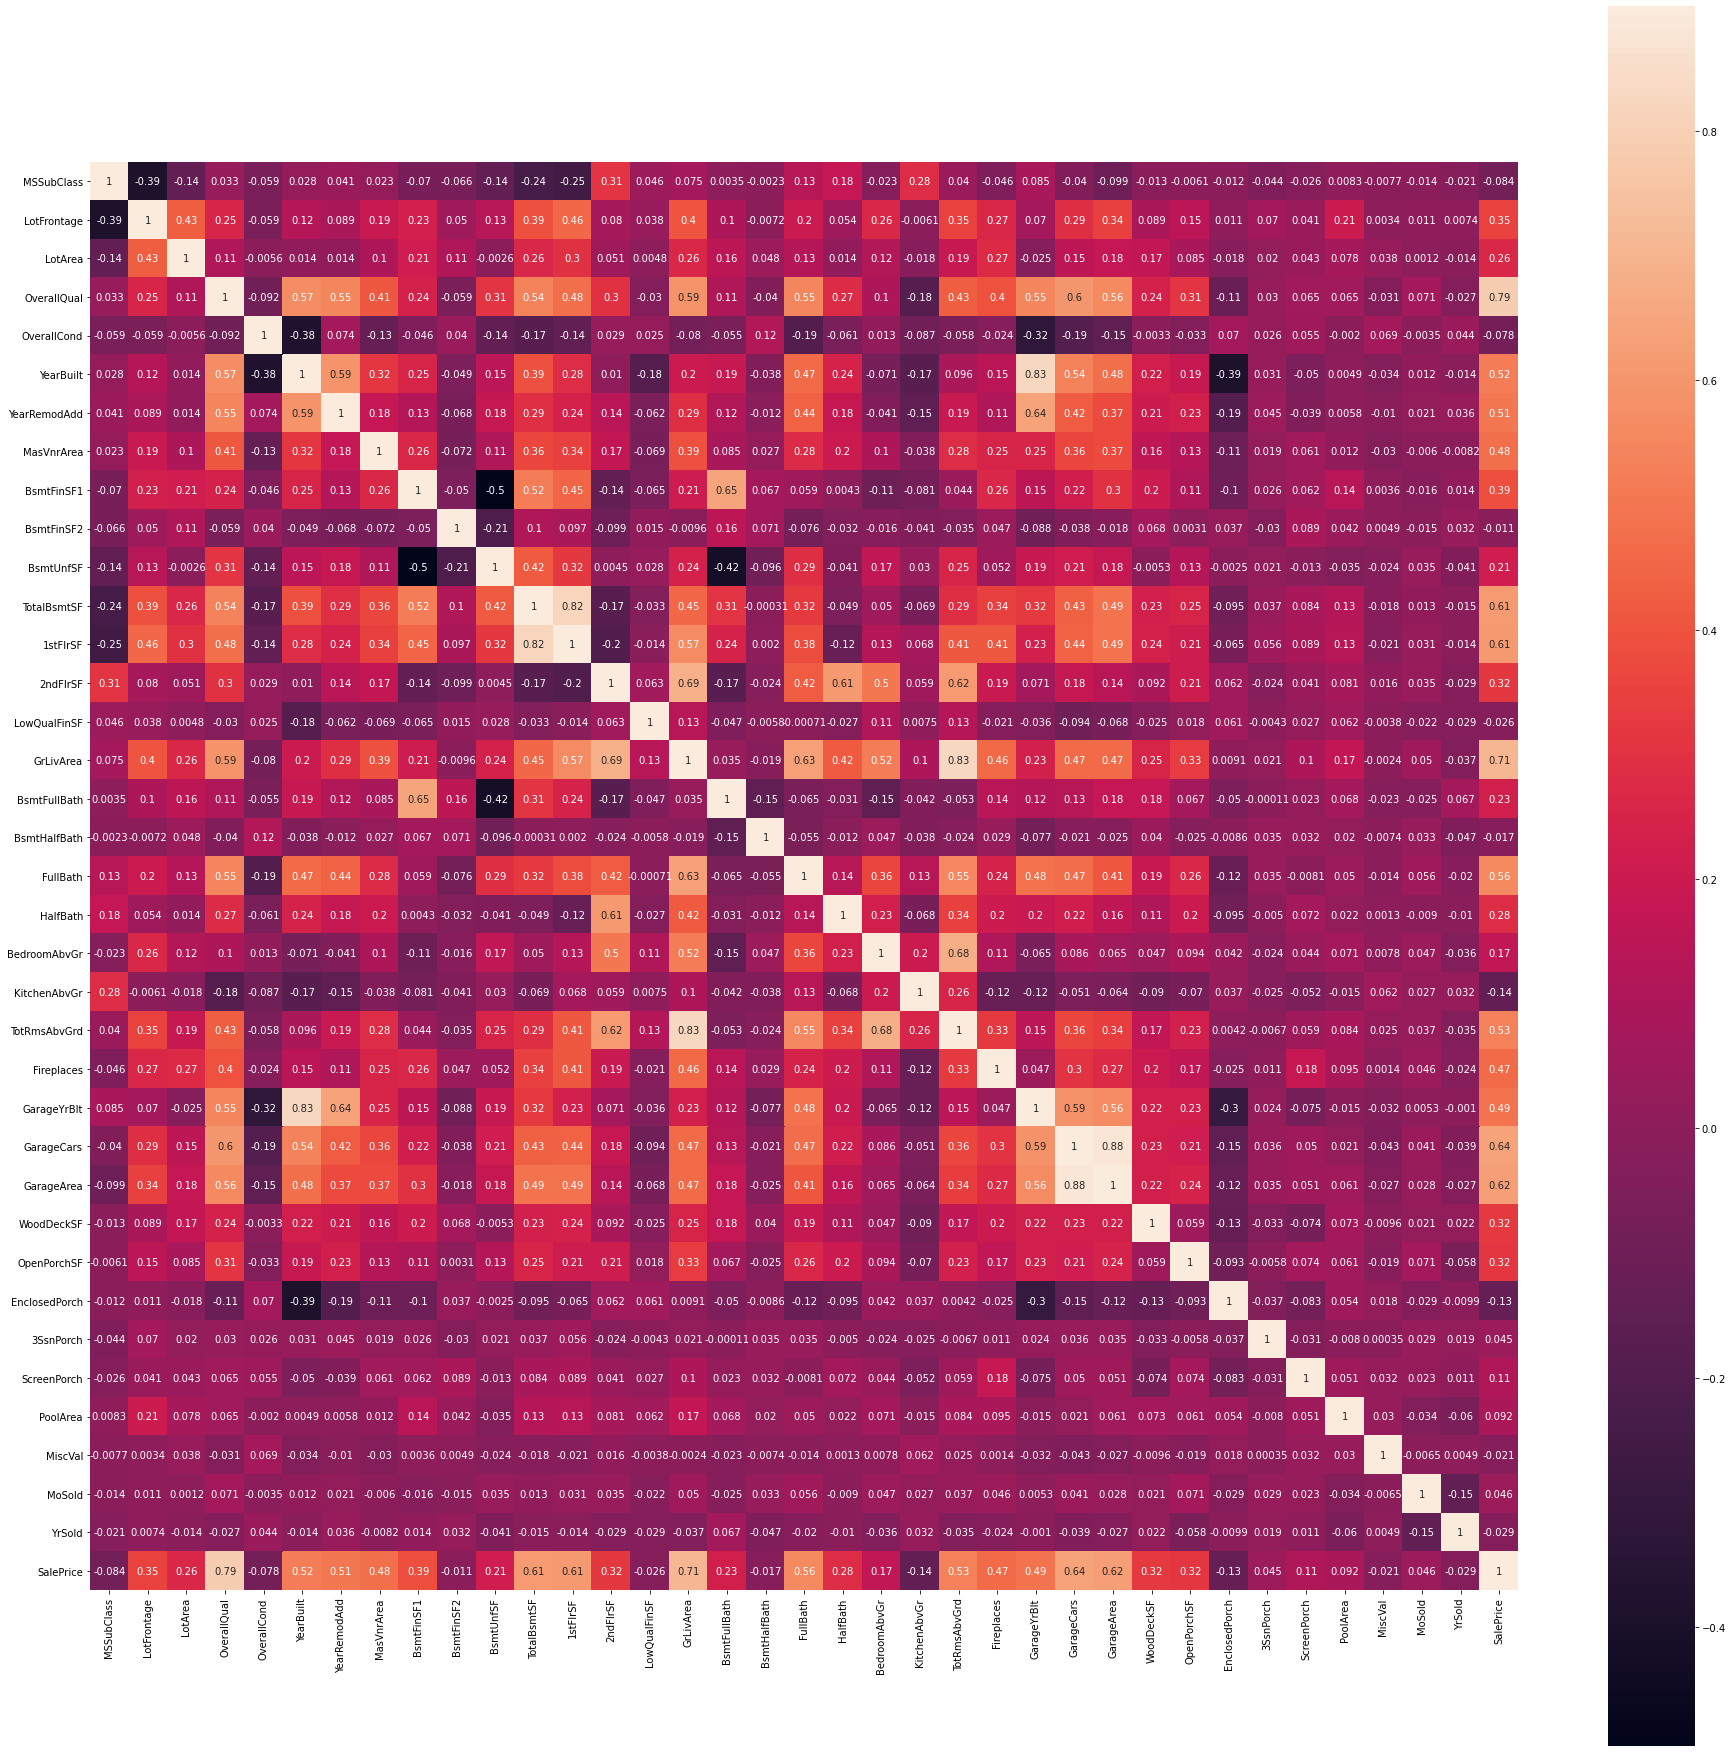

In [115]:
plt.subplots(figsize=(32,32))
sns.heatmap(train.corr(), vmax=0.9, square=True, annot=True)

In [105]:
X2_train = X_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                '1stFlrSF']]
X2_test = X_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                '1stFlrSF',]]
y2_train = y_train

y2_test = y_test

In [106]:
from sklearn.linear_model import LinearRegression

linearmodel2 = LinearRegression().fit(X2_train,y2_train)

In [107]:
X2_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
135,7,1682,2,530,1304,1682
1452,5,1072,2,525,547,1072
762,7,1547,2,614,756,764
932,9,1905,3,788,1905,1905
435,7,1661,2,550,799,827
...,...,...,...,...,...,...
1095,6,1314,2,440,1314,1314
1130,4,1981,2,576,1122,1328
1294,5,864,2,572,864,864
860,7,1426,1,216,912,912


In [108]:
coeff2 = linearmodel2.score(X2_train, y2_train)
print('Coefficient of Determination for Experiment 2:', coeff)

Coefficient of Determination for Experiment 2: 0.6760401951362368


In [109]:
y2_pred = linearmodel2.predict(X2_test)

In [110]:
mae = metrics.mean_absolute_error(y2_test, y2_pred)
mse = metrics.mean_squared_error(y2_test, y2_pred)
rmse = metrics.mean_squared_error(y2_test, y2_pred,squared = False)

print('Coefficient of Determination: {:.2f}'.format(coeff2*100))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 74.22
Mean Absolute Error: 25029.233107938428
Mean Square Error: 1435575102.1083298
Root Mean Square Error: 37888.983914963064


Experiment 3

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [119]:
fsa = SelectKBest(score_func=f_regression, k='all')
fsa.fit(X_train1, y_train1)
X_train_fsa = fsa.transform(X_train1)
X_test_fsa = fsa.transform(X_test1)

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
randomfm = RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train_fsa, y_train1)

y_pred1 = randomfm.predict(X_test_fsa)

In [130]:
coff = randomfm.score(X_train_fsa, y_train1)
print('Coefficient of Determination: {:.2f}'.format(coff*100))

mae = metrics.mean_absolute_error(y_test1, y_pred1)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_test1, y_pred1)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y_test1, y_pred1,squared = False)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 96.95
Mean Absolute Error: 21237.263434268323
Mean Square Error: 1032175963.1788985
Root Mean Square Error: 32127.4954389367


In [133]:
from sklearn.linear_model import Lasso

In [134]:
lassomodel = Lasso().fit(X_train_fsa,y_train1)

y_pred2 = lassomodel.predict(X_test_fsa)

In [135]:
coffl = lassomodel.score(X_train_fsa, y_train1)
print('Coefficient of Determination: {:.2f}'.format(coffl*100))

mae = metrics.mean_absolute_error(y_test1, y_pred2)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_test1, y_pred2)
print('Mean Square Error:', mse)

rmse = metrics.mean_squared_error(y_test1, y_pred2,squared = False)
print('Root Mean Square Error:', rmse)

Coefficient of Determination: 67.60
Mean Absolute Error: 28606.276295221585
Mean Square Error: 1981962881.2191403
Root Mean Square Error: 44519.241696362486
